In [2]:
# X
# dependencies
import os
import pandas as pd
import pymongo
import requests
import sys

from bs4 import BeautifulSoup
from IPython.display import Image
from sys import platform
from webdriver_manager.chrome import ChromeDriverManager

# import Splinter and set the chromedriver path
from splinter import Browser

# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# This has run successfully when "Driver has been saved in cache" appears in pink below
# and a new browser window opens with nothing in it.

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [/Users/pbernhardt/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


# Step One: the scraping

In [3]:
# X
# scraping NASA Mars News
# collect the latest News Title and Paragraph Text from redplanetscience.com...
url = "https://redplanetscience.com"
browser.visit(url)
# print(url)

In [4]:
# Retrieve page with the requests module
response = browser.html
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(response, 'html.parser')
soup

<html><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link crossorigin="anonymous" href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet" type="text/css"/>
<link href="css/app.css" rel="stylesheet" type="text/css"/>
<link crossorigin="anonymous" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" rel="stylesheet"/>
<title>News - Mars Exploration Program</title>
</head>
<body>
<div class="col-md-12">
<div class="row">
<nav class="navbar navbar-expand-lg navbar-light fixed-top">
<div class="container-fluid">
<a class="navbar-brand" href="#">
<img src="image/nasa.png" width="80"/><span class="logo">MARS Planet Science</span>
<span class="logo1">Exploration Program</spa

In [5]:
#X From inspecting the HTML, it should be "list_text" --> "list_date" --> "content_title"
# although that doesn't appear in soup above
news_title = soup.find("div", class_ = "content_title").get_text()
news_title

'NASA to Hold Mars 2020 Perseverance Rover Launch Briefing'

In [6]:
#X <div class="article_teaser_body">...</div>
# And div.article_teaser_body should be the paragraph text from the latest news title.
news_graf_results = soup.find("div", class_="article_teaser_body").get_text()
news_graf = news_graf_results
news_graf

"Learn more about the agency's next Red Planet mission during a live event on June 17."

In [7]:
# X
# scraping JPL Mars Space Images - Featured Image
# visit spaceimages-mars.com...
url = "https://spaceimages-mars.com/"
browser.visit(url)
# print(url)

# Retrieve page with the requests module
response = browser.html
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(response, 'html.parser')
soup

<html class=""><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" rel="stylesheet"/>
<!-- <link rel="stylesheet" type="text/css" href="css/font.css"> -->
<link href="css/app.css" rel="stylesheet" type="text/css"/>
<link href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
<title>Space Image</title>
<style type="text/css">.fancybox-margin{margin-right:15px;}</style></head>
<body>
<div class="header">
<nav class="navbar navbar-expand-lg">
<a class="navbar-brand" href="#"><img id="logo" src="image/nasa.png"/><span class="logo">Jet Propulsion Laboratory</span>
<span class="logo1">California Institute of Technology</span></a>
<button aria-controls="navbarNav" aria-expanded="false" aria-label="Toggle navigation" class="navbar-toggler" data-target="#navbarNav" data-toggle="collapse" type="button

In [9]:
# ...and find the URL of the current Featured Mars Image 
# and assign the url string to a variable called featured_image_url.
# Find the URL of the *full size* .jpg image.
# Save a complete url string for this image, e.g.
# featured_image_url = "https://spaceimages-mars.com/image/featured/mars2.jpg"

# The Full Image button on the homepage links to this 
# <a target="_blank" class="showimg fancybox-thumbs" href="image/featured/mars2.jpg">

# X
# These didn't work:
# featured_image_relative_url = soup.find("img", class_="headerimage fade-in").get_text()
# featured_image_relative_url = soup.find("div", class_="headerimage fade-in").get_text()
featured_image_relative_url = soup.find("a", class_="showimg fancybox-thumbs")
featured_image_relative_url = featured_image_relative_url.get("href")
# featured_image_relative_url

featured_image_url = f"{url}{featured_image_relative_url}"
print(featured_image_url)

https://spaceimages-mars.com/image/featured/mars1.jpg


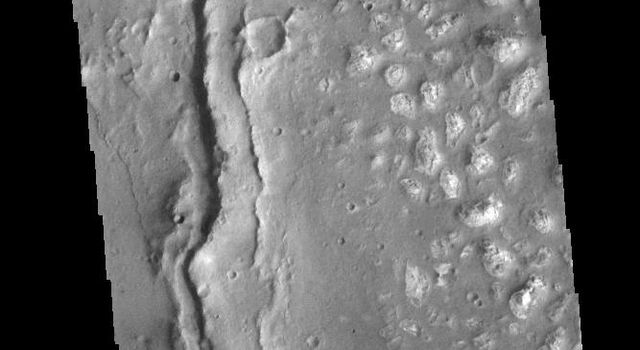

In [10]:
# X
Image(featured_image_url)

In [11]:
# X
# scraping Mars Facts
# visit galaxyfacts-mars.com
url = "https://galaxyfacts-mars.com"
browser.visit(url)
print(url)

https://galaxyfacts-mars.com


In [12]:
# X
# and use Pandas to scrape the table containing facts about the planet including:
# diameter, mass, usw.

# <table class="table table-striped"> seems to be this table.
HTML_tables = pd.read_html(url)
# HTML_tables
# type(HTML_tables)
df_from_html_table = HTML_tables[0]
df_from_html_table

,0,1,2
0,Mars - Earth Comparison,Mars,Earth
1,Diameter:,"6,779 km","12,742 km"
2,Mass:,6.39 × 10^23 kg,5.97 × 10^24 kg
3,Moons:,2,1
4,Distance from Sun:,"227,943,824 km","149,598,262 km"
5,Length of Year:,687 Earth days,365.24 days
6,Temperature:,-87 to -5 °C,-88 to 58°C


In [13]:
# X
# Use Pandas to convert the data to a HTML table string.
# Something about scraping the Wikipedia entry for state capitols.
# url = 'https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States'
html_from_df = df_from_html_table.to_html()
df_from_html_table.to_html("table.html")
print(html_from_df)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>0</th>
      <th>1</th>
      <th>2</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Mars - Earth Comparison</td>
      <td>Mars</td>
      <td>Earth</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Diameter:</td>
      <td>6,779 km</td>
      <td>12,742 km</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Mass:</td>
      <td>6.39 × 10^23 kg</td>
      <td>5.97 × 10^24 kg</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Moons:</td>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Distance from Sun:</td>
      <td>227,943,824 km</td>
      <td>149,598,262 km</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Length of Year:</td>
      <td>687 Earth days</td>
      <td>365.24 days</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Temperature:</td>
      <td>-87 to -5 °C</td>
      <td>-88 to 58°C</td>
    </tr>
  </tbody

In [14]:
# X
# If you're running macOS, this opens the table in its own browser window
if platform == "darwin":
    !open table.html
else:
    print(f"{os.getcwd()}/table.html")

In [21]:
# X
# scraping Mars Hemispheres
# Visit marshemispheres.com...
url = "https://marshemispheres.com"
browser.visit(url)
print(url)

https://marshemispheres.com


In [22]:
# 1/2
# ...to obtain high resolution images for each of Mars's hemispheres.
# Click each of the links to the hemispheres to find the URL of the full resolution image.
# Save both the image url string for the full resolution hemisphere image,
# and the Hemisphere title containing the hemisphere name.
# Use a Python dictionary to store the data using the keys img_url and title.
# Append the dictionary with the image url string and the hemisphere title to a list.
# This list will contain one dictionary for each hemisphere.

hemisphere_images = []
image_links = browser.find_by_css("a.product-item img")
print(image_links)

In [23]:
for i in range( len(image_links)):
    each_image = {}
    # A search for hrefs associated with "Hemisphere Enhanced"
    browser.find_by_css("a.product-item img")[i].click()
    # should return four URLs
    # can loop through clicking on each one
    # and on the new page that opens, scrape the URL associated with "Sample"
    hemisphere_links = browser.links.find_by_partial_text("Sample").first
    print(hemisphere_links)
    hemisphere_links["href"]
    title = browser.find_by_css("h2.title").text
    each_image["title"] = title
    each_image["link"] = hemisphere_links["href"]
    hemisphere_images.append(each_image)
    browser.back()
    

In [24]:
hemisphere_images

[{'title': 'Cerberus Hemisphere Enhanced',
  'link': 'https://marshemispheres.com/images/full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'link': 'https://marshemispheres.com/images/schiaparelli_enhanced-full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'link': 'https://marshemispheres.com/images/syrtis_major_enhanced-full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'link': 'https://marshemispheres.com/images/valles_marineris_enhanced-full.jpg'}]

In [25]:
# X
# close the session
browser.quit()

# Step 2: MongoDB and Flask

In [ ]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define database and collection
db = client.mars_db
collection = db.facts

# put together dictionary of each of the other elements I scraped
# and insert them one at a time into the MongoDB called collection
# 1 latest NASA Mars headline
fact = {"title": "news_title", "link": news_title}
collection.insert_one(fact)

# 2 first paragraph of latest MASA Mars news story
fact = {"title": "news_graf", "link": news_graf}
collection.insert_one(fact)

# 3 featured JPL Mars image
fact = {"title": "featured_image", "link": featured_image_url}
collection.insert_one(fact)

# 4 the table of data comparing Mars and Earth
fact = {"title": "data_table", "link": html_from_df}
collection.insert_one(fact)

# 5 each of four images of the hemispheres of Mars
x = range(4)
for i in x:
    # Dictionary to be inserted into MongoDB
    fact = hemisphere_images[i]

    # Insert dictionary into MongoDB as a document
    collection.insert_one(fact)

# Display the MongoDB records created above
facts = db.facts.find()
for fact in facts:
    print(fact)

In [26]:
# Use MongoDB with Flask templating to create a new HTML page
# that displays all of the information that was scraped from the URLs above.

# 1 Start by converting your Jupyter notebook into a Python script called scrape_mars.py
# with a function called scrape that will execute all of your scraping code from above
# and return one Python dictionary containing all of the scraped data.

{'_id': ObjectId('6071aedad3f1a452e06e9faf'), 'title': 'news_title', 'link': 'NASA to Hold Mars 2020 Perseverance Rover Launch Briefing'}
{'_id': ObjectId('6071aedad3f1a452e06e9fb0'), 'title': 'news_graf', 'link': "Learn more about the agency's next Red Planet mission during a live event on June 17."}
{'_id': ObjectId('6071aedad3f1a452e06e9fb1'), 'title': 'featured_image', 'link': 'https://spaceimages-mars.com/image/featured/mars1.jpg'}
{'_id': ObjectId('6071aedad3f1a452e06e9fb2'), 'title': 'data_table', 'link': '<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Mars - Earth Comparison</td>\n      <td>Mars</td>\n      <td>Earth</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Diameter:</td>\n      <td>6,779 km</td>\n      <td>12,742 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n  

In [ ]:
# 2 Next, create a route called /scrape that will import your scrape_mars.py script and
# call your scrape function.

In [ ]:
# 3 Store the return value in Mongo as a Python dictionary.

In [ ]:
# 4 Create a root route / that will query your Mongo database and
# pass the Mars data into an HTML template to display the data.

In [ ]:
# 5 Create a template HTML file called index.html that will take the mars data dictionary and
# display all of the data in the appropriate HTML elements.
# Use the following as a guide for what the final product should look like,
# but feel free to create your own design:
print("https://umn.bootcampcontent.com/University-of-Minnesota-Boot-Camp/uofm-stp-data-pt-12-2020-u-c/tree/master/02-Homework/12-Web-Scraping-and-Document-Databases/Instructions"
)

# Step 3: Submit

In [ ]:
# Upload the Jupyter Notebook containing the scraping code and
# screenshots of your final application
# to your GitHub repository and submit the link.
# Ensure your repository has regular commits (i.e. 20+ commits) and
# a thorough README.md file.

# Hints

In [ ]:
# Use Splinter to navigate the sites when needed and
# BeautifulSoup to help find and parse out the necessary data.

# Use Pymongo for CRUD applications for your database.
# For this homework, you can simply overwrite the existing document each time
# the /scrape url is visited and new data is obtained.

# Use Bootstrap to structure your HTML template.